In [1]:
import numpy as np
from numpy.random import randint, randn
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import csv
import re
import pandas as pd 
import sklearn.linear_model as skl
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from scipy.optimize import curve_fit
from IPython.display import display
import os
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from random import random, seed

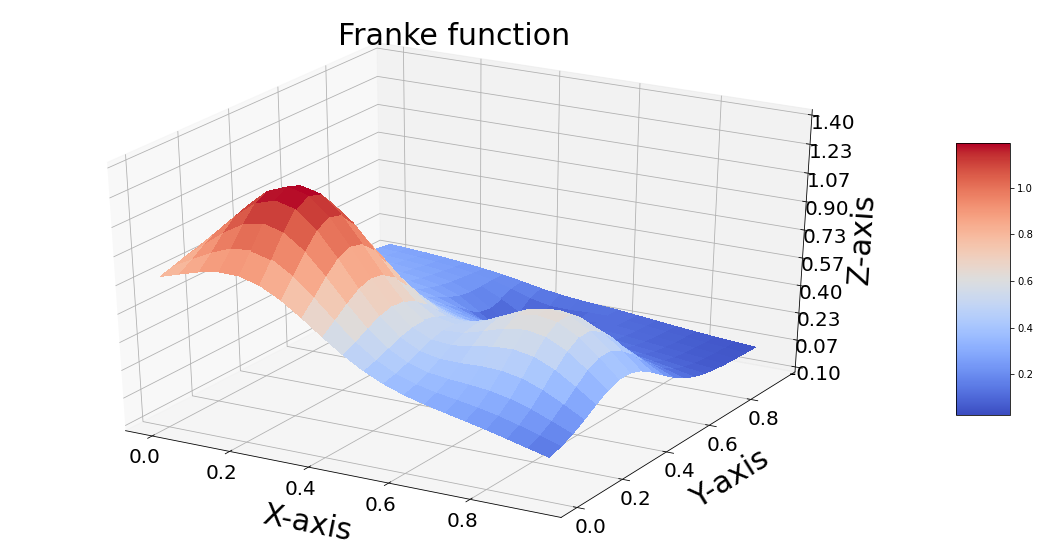

In [2]:
# Generate data
x = np.arange(0, 1, 0.05) # Returns evenly spaced values within a given interval.
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y) # Returns coordinate matrices from coordinate vectors.

# Define Franke function (without noise)
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

z = FrankeFunction(x, y)

#Plot Franke function
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
ax.set_zlim(-0.10,1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.set_title('Franke function', fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.savefig("Franke_func.jpg", dpi=300)

Part a) Ordinary Least Square (OLS) on Franke function

The model performance for training set before scaling
-----------------------------------------------------
Train MSE before scaling: 0.0012
Train R2 score before scaling 0.9848

The model performance for testing set before scaling
----------------------------------------------------
Test MSE before scaling: 0.0023
Test R2 score before scaling 0.9675

The model performance for training set after scaling
-----------------------------------------------------
Train MSE after scaling: 0.6747
Train R2 score after scaling -7.4710

The model performance for testing set after scaling
-----------------------------------------------------
Test MSE after scaling: 0.5397
Test R2 score after scaling -6.7793

Variance of beta 0 OLS 0.0025252685
Variance of beta 1 OLS 0.1097572364
Variance of beta 2 OLS 0.2244942627
Variance of beta 3 OLS 1.7171279386
Variance of beta 4 OLS 2.3950134452
Variance of beta 5 OLS 2.9307308012
Variance of beta 6 OLS 9.0877786358
Variance of beta 7 OLS 6.2849433912
Varianc

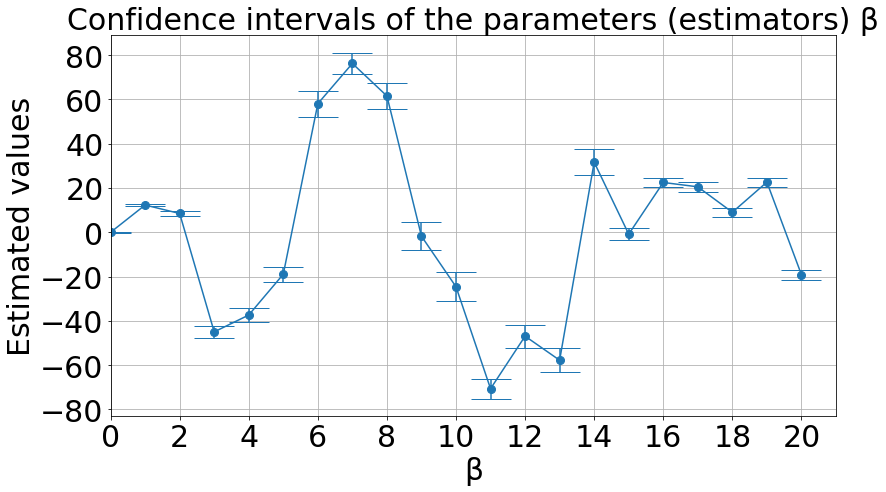

In [3]:
# Generating the dataset with x,y belonging in the interval [0,1]
x = np.random.rand(100) # Creates an array of the given shape and populates it with random samples 
# from a uniform distribution over [0, 1).
y = np.random.rand(100)
x = np.ravel(x) # Returns a contiguous flattened array.
y = np.ravel(y)
vals = np.concatenate(([x],[y]), axis=0).T # Joins a sequence of arrays along an existing axis

# Stochastic noise using the standard normal distribution N(0,1)
mu, sigma = 0,0.01 # sigma = standard deviation
datapoints = len(vals)
noise = mu + sigma*np.random.randn(datapoints)

# Defining the Franke function (with noise)
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    term5 = noise
    return term1 + term2 + term3 + term4 + term5

z = FrankeFunction(x, y)

# Polynomials in x and y up to fifth order
poly = PolynomialFeatures(5) # argument: polynomial degree
# Generates a new feature matrix consisting of all polynomial combinations of the features 
# with degree less than or equal to the specified degree.

# Design matrix X
X = poly.fit_transform(vals) # Fit to data, then transform it.

#print(X)
#print(X.shape)

# split in training (80%) and test data
X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)

# standard least square regression before scaling

clf = skl.LinearRegression().fit(X_train, y_train)
ytilde_train = clf.predict(X_train)
ytilde_test = clf.predict(X_test)

# The mean squared error and R2 score before scaling
print("The model performance for training set before scaling")
print("-----------------------------------------------------")
#print("Train MSE before scaling: %.4f" % mean_squared_error(y_train, ytilde_train))
print("Train MSE before scaling: {:.4f}".format(mean_squared_error(clf.predict(X_train), y_train)))
#print("Train R2 score before scaling: %.4f" % r2_score(y_train,ytilde_train))
print("Train R2 score before scaling {:.4f}".format(clf.score(X_train,y_train))) #1 is perfect prediction
print("")
print("The model performance for testing set before scaling")
print("----------------------------------------------------")
#print("Test MSE before scaling: %.4f" % mean_squared_error(y_test, ytilde_test))
print("Test MSE before scaling: {:.4f}".format(mean_squared_error(clf.predict(X_test), y_test)))
#print("Test R2 score before scaling: %.4f" % r2_score(y_test,ytilde_test))
print("Test R2 score before scaling {:.4f}".format(clf.score(X_test,y_test)))
print("")

#print(print(clf.coef_, clf.intercept_))

# scaling the data
scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# standard least square regression after scaling

model = skl.LinearRegression().fit(X_train_scaled, y_train)
ytilde_train_scaled = model.predict(X_train_scaled)
ytilde_test_scaled = model.predict(X_test_scaled)

# The mean squared error and R2 score after scaling
print("The model performance for training set after scaling")
print("-----------------------------------------------------")
#print("Train MSE after scaling: %.4f" % mean_squared_error(y_train, ytilde_train_scaled))
print("Train MSE after scaling: {:.4f}".format(mean_squared_error(clf.predict(X_train_scaled), y_train)))
#print("Train R2 score after scaling: %.4f" % r2_score(y_train,ytilde_train_scaled))
print("Train R2 score after scaling {:.4f}".format(clf.score(X_train_scaled,y_train))) #1 is perfect prediction
print("")
print("The model performance for testing set after scaling")
print("-----------------------------------------------------")
#print("Test MSE after scaling: %.4f" % mean_squared_error(y_test, ytilde_test_scaled))
print("Test MSE after scaling: {:.4f}".format(mean_squared_error(clf.predict(X_test_scaled), y_test)))
#print("Test R2 score after scaling: %.4f" % r2_score(y_test,ytilde_test_scaled))
print("Test R2 score after scaling {:.4f}".format(clf.score(X_test_scaled,y_test)))
print("")
#print(print(clf.coef_, clf.intercept_))

# Variance of beta
#sigma = 0.01 # defined earlier
var_beta = sigma**2*np.diagonal(np.linalg.inv(X_train.T @ X_train))
std = np.sqrt(var_beta)
#print(var_beta[1])
#print(var_beta[2])

for i in range(len(var_beta)):
    print("Variance of beta %.2s OLS %.10f" % (i,var_beta[i]))

standard_error = np.sqrt(np.absolute(var_beta))
conf_plus = clf.coef_ + (1.96*standard_error)/np.sqrt(100)
conf_minus = clf.coef_ - (1.96*standard_error)/np.sqrt(100) 
err = (1.96*standard_error)/np.sqrt(100)
#print(conf_plus)
#print(conf_minus)
#print(sigma)

x=list(range(0, 21))
beta = clf.coef_
#print(x)
fig1 = plt.figure(figsize=(13,7))
axes = plt.gca()
axes.set_xlim([0,21])
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.errorbar(x, beta, 1.96*std, fmt='-o', markersize=8, capsize=20)
plt.xlabel('β',size=30)
plt.ylabel('Estimated values',fontsize=30)
plt.title('Confidence intervals of the parameters (estimators) β',fontsize=30)
fig1.savefig("confidence_intervals.jpg", dpi=150)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
axes.grid(b=True, which='major', linestyle='-')
plt.show()

Part b) Bias-variance trade-off and resampling techniques

In [9]:
x=np.array(x)
y=np.array(y)

In [10]:
def CreateDesignMatrix_X(x, y, d ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((d+1)*(d+2)/2)      # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,d+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = x**(i-k) * y**k

    return X

In [11]:
CreateDesignMatrix_X(x,y,5)

ValueError: operands could not be broadcast together with shapes (21,) (100,) 

In [ ]:
Maxpolydegree = 5
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
trials = 100
# here we define a polynomial up to degree 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

In [ ]:
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = x**degree

In [ ]:
print(X.shape)

In [ ]:
#we need trials so we plot every degree of polynomial
#loop over trials in order to estimate the expectation value of the MSE 
testerror[polydegree] = 0.0
trainingerror[polydegree] = 0.0
for samples in range(trials):
        X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)
        #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
        ypred = model.predict(X_train)
        ytilde = model.predict(X_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred)

        testerror[polydegree] /= trials
        trainingerror[polydegree] /= trials
        print("Degree of polynomial: %2s"% polynomial[polydegree])
        print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
        print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.title('Standard OLS fitting')
plt.show()

In [ ]:
Maxpolydegree = 5
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
trials = 100
# here we define a polynomial up to degree 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = x**(degree)
        
        
#we need trials so we plot every degree of polynomial
#loop over trials in order to estimate the expectation value of the MSE 
    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(trials):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred)

    testerror[polydegree] /= trials
    trainingerror[polydegree] /= trials
    #print("Degree of polynomial: %3d"% polynomial[polydegree])
    #print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
    #print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.title('Standard OLS fitting')
plt.show()
